In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.3

train_ds = tf.keras.utils.image_dataset_from_directory(
directory ="D:\\archive",
image_size = (256, 256),
validation_split = validation_split,
subset = "training",
seed = seed_train_validation,
color_mode = 'rgb',
shuffle = shuffle_value)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory ="D:\\archive",
image_size = (256, 256),
validation_split = validation_split,
subset = "validation",
seed = seed_train_validation,
color_mode = 'rgb',
shuffle = shuffle_value)


Found 811 files belonging to 3 classes.
Using 568 files for training.
Found 811 files belonging to 3 classes.
Using 243 files for validation.


In [33]:
model = tf.keras.models.Sequential()
layers = tf.keras.layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [34]:
model.compile(
          optimizer = 'adam',
          loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'])

In [36]:
history = model.fit(train_ds, 
                    epochs = 10,
                    validation_data = val_ds)

Epoch 1/10
18/18 [==============================] - 18s 1s/step - loss: 0.6589 - accuracy: 0.7394 - val_loss: 1.2243 - val_accuracy: 0.4897
Epoch 2/10
18/18 [==============================] - 19s 1s/step - loss: 0.5250 - accuracy: 0.7923 - val_loss: 1.1441 - val_accuracy: 0.5514
Epoch 3/10
18/18 [==============================] - 19s 1s/step - loss: 0.5133 - accuracy: 0.8451 - val_loss: 1.7218 - val_accuracy: 0.5391
Epoch 4/10
18/18 [==============================] - 19s 1s/step - loss: 0.4724 - accuracy: 0.8063 - val_loss: 1.3686 - val_accuracy: 0.5844
Epoch 5/10
18/18 [==============================] - 19s 1s/step - loss: 0.3118 - accuracy: 0.8732 - val_loss: 1.9733 - val_accuracy: 0.5267
Epoch 6/10
18/18 [==============================] - 20s 1s/step - loss: 0.2981 - accuracy: 0.9032 - val_loss: 1.3226 - val_accuracy: 0.5638
Epoch 7/10
18/18 [==============================] - 20s 1s/step - loss: 0.1962 - accuracy: 0.9278 - val_loss: 1.8665 - val_accuracy: 0.6296
Epoch 8/10
18/18 [==

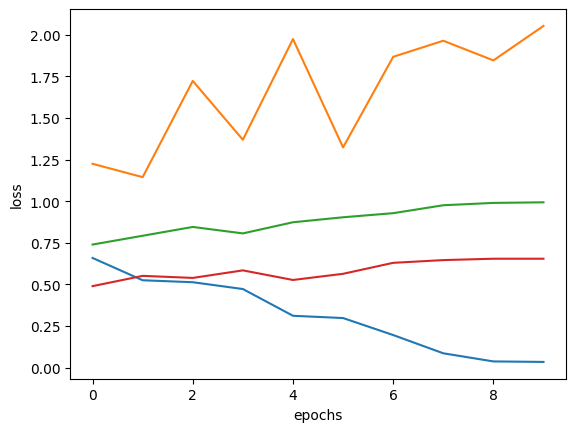

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.xlabel("epochs")
plt.ylabel("loss")

plt.plot(history.history['val_accuracy'])


In [56]:
print(max(history.history['accuracy']))
print(max(history.history['val_accuracy']))

0.9929577708244324
0.654321014881134
